In [1]:
import pandas as pd
import numpy as np
import scipy as sci
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from scipy.stats import pearsonr

In [71]:
dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

In [75]:
dep['DepMap_ID'][420:430]

420    ACH-000768
421    ACH-000769
422    ACH-000770
423    ACH-000771
424    ACH-000773
425    ACH-000774
426    ACH-000775
427    ACH-000776
428    ACH-000777
429    ACH-000778
Name: DepMap_ID, dtype: object

In [21]:
dep.shape

(769, 18119)

In [32]:
dep2 = dep

In [6]:
#dep = dep.drop('DepMap_ID',1)

In [70]:
dep["PEX13 (5194)"].sort_values()

595    0.000025
461    0.000033
571    0.000069
227    0.000134
169    0.000135
22     0.000151
81     0.000179
389    0.000241
221    0.000275
736    0.000298
652    0.000316
161    0.000364
708    0.000365
305    0.000394
541    0.000447
125    0.000459
159    0.000478
362    0.000478
402    0.000552
229    0.000562
691    0.000569
450    0.000618
349    0.000626
547    0.000636
713    0.000656
497    0.000698
45     0.000732
625    0.000767
671    0.000771
596    0.000787
         ...   
357    0.372680
580    0.373126
254    0.376467
654    0.390016
430    0.405887
232    0.411331
697    0.420466
532    0.440516
68     0.462902
474    0.505768
209    0.521275
442    0.532087
103    0.532999
391    0.538461
760    0.565887
1      0.606702
170    0.623079
120    0.624560
498    0.625653
394    0.631236
35     0.672565
294    0.723517
553    0.729631
332    0.770331
38     0.813401
329    0.847058
0      0.873082
519    0.878571
17     0.908969
425    0.984307
Name: PEX13 (5194), Leng

In [5]:
a = dep['A1BG (1)']
b = dep['A2M (2)']


sci.stats.pearsonr(a,b)

(0.02839725883937799, 0.4316579626191092)

In [6]:
# the matrix
correlations = dep.corr()

In [4]:
sci.stats.pearsonr(dep['A2M (2)'][1:4],dep['A2M (2)'][1:4])

(1.0, 0.0)

In [7]:
#sci.stats.pearsonr(dep.columns.values,dep.columns.values)

In [38]:
#correlations[["A2M (2)"]].sort_values(by=['A2M (2)'])

In [20]:
#pip install bioinfokit

## Test Data

In [49]:
df = pd.DataFrame(np.random.random((6, 6)), columns=['gene_' + chr(i + ord('a')) for i in range(6)]) 
print(df)

     gene_a    gene_b    gene_c    gene_d    gene_e    gene_f
0  0.197624  0.260580  0.653891  0.765120  0.368098  0.214169
1  0.592195  0.475498  0.887240  0.355919  0.041875  0.840824
2  0.368150  0.804930  0.904507  0.690116  0.631721  0.423614
3  0.530851  0.846071  0.435289  0.874329  0.395183  0.733294
4  0.537944  0.735966  0.351764  0.013963  0.618393  0.292811
5  0.939406  0.232526  0.922291  0.721885  0.545358  0.269370


In [50]:
correlations = {}
columns = df.columns.tolist()

In [51]:
for col_a, col_b in itertools.combinations(columns, 2):
    correlations[col_a + '__' + col_b] = pearsonr(df.loc[:, col_a], df.loc[:, col_b])

In [52]:
res = pd.DataFrame.from_dict(correlations, orient='index')
res.columns = ['PCC', 'p-value']

print(result.sort_index())

                                       PCC       p-value
A1BG (1)__A1CF (29974)           -0.007933  8.261635e-01
A1BG (1)__A2M (2)                 0.028397  4.316580e-01
A1BG (1)__A2ML1 (144568)          0.123012  6.292805e-04
A1BG (1)__A3GALT2 (127550)        0.162194  6.171681e-06
A1BG (1)__A4GALT (53947)          0.030070  4.050133e-01
A1BG (1)__A4GNT (51146)           0.164914  4.280512e-06
A1BG (1)__AAAS (8086)            -0.045352  2.090285e-01
A1BG (1)__AACS (65985)            0.017822  6.216910e-01
A1BG (1)__AADAC (13)              0.035006  3.323150e-01
A1BG (1)__AADACL2 (344752)        0.186395  1.927638e-07
A1BG (1)__AADACL3 (126767)       -0.020894  5.629092e-01
A1BG (1)__AADACL4 (343066)        0.092953  9.906966e-03
A1BG (1)__AADAT (51166)           0.075106  3.731330e-02
A1BG (1)__AAED1 (195827)          0.002314  9.489209e-01
A1BG (1)__AAGAB (79719)          -0.049549  1.698634e-01
A1BG (1)__AAK1 (22848)            0.006219  8.632898e-01
A1BG (1)__AAMDC (28971)        

In [56]:
sorted_pcc = result.sort_values(by=["PCC"])

In [67]:
sorted_pcc

,PCC,p-value
AARS (16)__ALOX5AP (241),-0.860687,4.619332e-227
AARS (16)__APOO (79135),-0.770419,4.251157e-152
AARS (16)__ABCA10 (10349),-0.710337,4.266430e-119
AARS (16)__ACO1 (48),-0.688335,4.796087e-109
AARS (16)__ANKRD13B (124930),-0.649842,1.820625e-93
AARS (16)__ADGRL4 (64123),-0.649495,2.456178e-93
AARS (16)__ADRA1A (148),-0.632739,3.010597e-87
ANAPC11 (51529)__ARHGAP44 (9912),-0.625192,1.259788e-84
AARS (16)__ABI3BP (25890),-0.622251,1.265207e-83
AARS (16)__ADCY5 (111),-0.620763,4.029007e-83


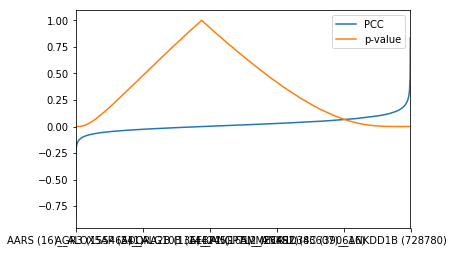

In [66]:
sorted_pcc.plot()

## Pairwise Gene Correlations DepMap 20Q2

In [47]:
data = dep2
data = data.replace(-np.inf, np.nan)
data = data.replace(np.inf,np.nan)
data = data.fillna(0)
corrs = {}
cols = data.columns.tolist()

In [73]:
#data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

In [48]:
for col_a, col_b in itertools.combinations(cols, 2):
    corrs[col_a + '__' + col_b] = pearsonr(data.loc[:, col_a], data.loc[:, col_b])

KeyboardInterrupt: 

In [ ]:
result = pd.DataFrame.from_dict(corrs, orient='index')
result.columns = ['PCC', 'p-value']

#print(result.sort_index())

result.sort_values(by=['PCC'])

In [14]:
# berechnung dauert lang, unbedingt als csv exportieren
result.to_csv('pairwise-gene-correlations-DepMap-20Q2.csv')

todo:

for the gene interaction pairs
pair-correlation-scoreverteilung binnen und plotten. Unerwartete Bimodalitaet bzw tails?


dependency-matrix clustern. ?

wir nehmen die besten 15% der scores und 
nehmen die relevanten matrixteile als unsere
neue ausgangsmatrix.

diese sollte man nun durchsuchen koennen,
naemlich nach Gen-paaren. 

dh die matrix besteht aus conditions, die
unser output sind, und signifikanten gen-paaren.

conditions bleiben alle, wir beschneiden die
gene die wir drinlassen. 

frage: wie sehen wir die? wir haben die werte
ja von den gen-paaren, und jetzt eine matrix 
von genen und conditions.



   c c c c c c c c c 

g  1 0 0 0 0 0 0 0 0 

g  1 0 0 0 0 0 0 0 0

g  

g

macht das sinn?



todo also:
how to efficiently rename colum names, for conditions.

if you can do that, i am still not sure if the same lines will mean anything.
see if it works with the depmap and the avana data.


In [ ]:
import pandas as pd
import numpy as np
import scipy as sci
import itertools
from scipy.stats import pearsonr

dep = pd.read_csv("/home/annerer/Downloads/Achilles_gene_dependency.csv")

data = dep
data = data.replace(-np.inf, np.nan)
data = data.replace(np.inf,np.nan)
data = data.fillna(0)
corrs = {}
cols = data.columns.tolist()

for col_a, col_b in itertools.combinations(cols, 2):
    corrs[col_a + '__' + col_b] = pearsonr(data.loc[:, col_a], data.loc[:, col_b])

result = pd.DataFrame.from_dict(corrs, orient='index')
result.columns = ['PCC', 'p-value']

print(result.sort_index())
# berechnung dauert lang, unbedingt als csv exportieren
result.to_csv('pairwise-gene-correlations-DepMap-20Q2.csv')